## **DATA ANALYSIS USING PYTHON - BLINKIT**

#### **Importing the liberries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Importing Raw Data**

In [4]:
df = pd.read_csv("C:/Users/HP/Downloads/blinkit_data.csv")

#### **Sample Data**

In [7]:
df.tail(20)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8503,Regular,FDR22,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.018473,NaN,109.9544,4.0
8504,Regular,FDS09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.080696,NaN,51.3008,4.0
8505,Regular,FDS34,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.076387,NaN,112.1518,4.0
8506,Regular,FDU09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.066275,NaN,54.1956,4.0
8507,Regular,FDU33,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.134057,NaN,45.3402,4.0
8508,Regular,FDU57,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.089121,NaN,149.8708,4.0
8509,Regular,FDU58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.028871,NaN,188.7898,4.0
8510,Regular,FDX46,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.057835,NaN,57.5562,4.0
8511,Regular,FDX57,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.047037,NaN,96.4068,4.0
8512,Regular,FDY33,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.096730,NaN,159.0262,4.0


#### **Size of Data**

In [8]:
df.shape

(8523, 12)

In [9]:
print("Size of Data:", df.shape)

Size of Data: (8523, 12)


In [10]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

#### **Data Cleaning**

In [11]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [12]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [13]:
df['Item Fat Content'] = df['Item Fat Content']. replace({'LF': 'Low Fat',
                                                          'low fat':'Low Fat',
                                                          'reg':'Regular'
                                                         })

In [14]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


#### **Business Requirements**

#### **1. KPI's**

In [24]:
#Total Sales
total_sales = df['Sales'].sum()

#Average Sales
avg_sales = df['Sales'].mean()

#Number of Items Sold
no_of_items_sold = df['Sales'].count()

#Average Ratings
avg_ratings = df['Rating'].mean()

#Display

print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${avg_sales:,.0f}")
print(f"Number of Items Sold: ${no_of_items_sold:,.0f}")
print(f"Average Ratings: ${avg_ratings:,.1f}")

Total Sales: $1,201,681
Average Sales: $141
Number of Items Sold: $8,523
Average Ratings: $4.0


#### **2. Charts Requirements**

##### **Total Sales by Fat Content**

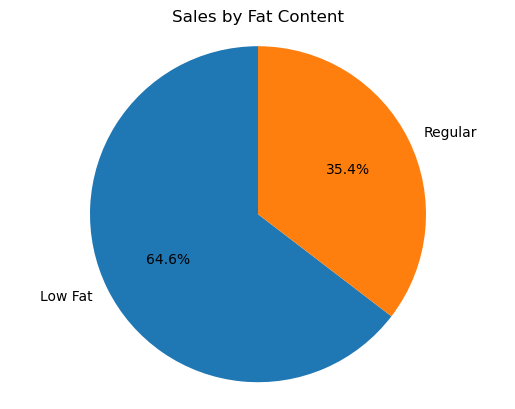

In [30]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels= sales_by_fat.index,
                        autopct ='%.1f%%',
                        startangle =90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()
                          

##### **Total Sales by Item Type**

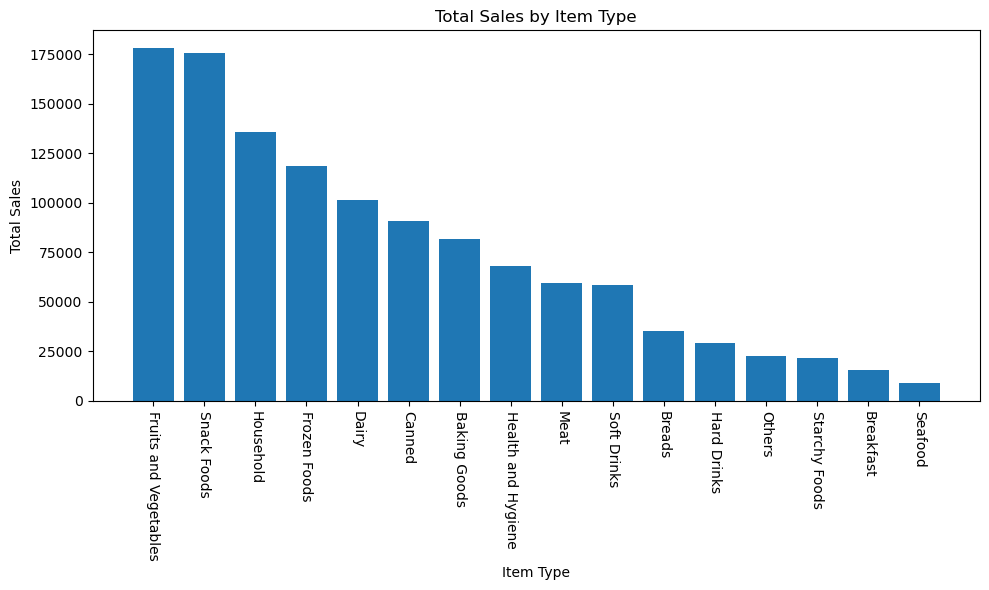

In [34]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize = (10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

plt.tight_layout()
plt.show()

##### **Fat Content by Outlet for Total Sales**

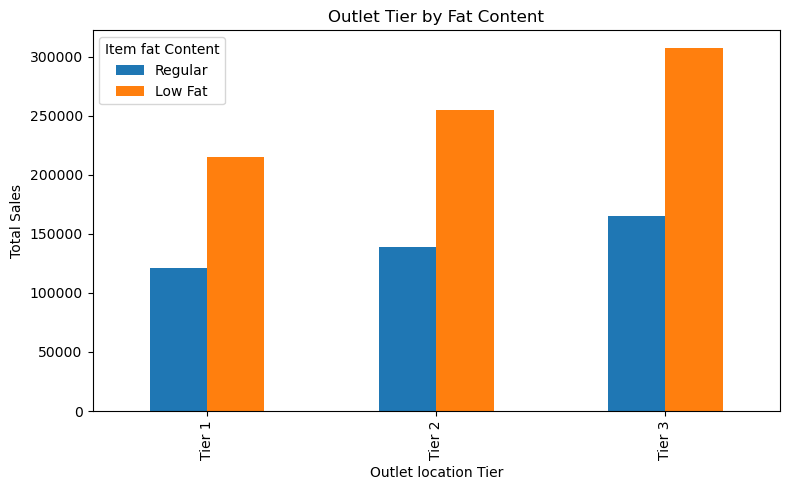

In [37]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize =(8, 5), title = 'Outlet Tier by Fat Content')
plt.xlabel('Outlet location Tier')
plt.ylabel('Total Sales')
plt.legend(title= 'Item fat Content')
plt.tight_layout()
plt.show()

##### **Total Sales by Outlet Establishment**